# ライブラリのインポート

In [1]:
#data analysis libraries 
import numpy as np
import pandas as pd

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

# データセットの読み込み

## データの分類

#### Numerical Features:数値データ
#### Categorical Features: カテゴリデータ 
#### Alphanumeric Features: 英数字的データ(名前など)

In [2]:
#import train and test CSV files
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
train[:3]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


# 基本統計量の確認

In [3]:
#take a look at the training data
train.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Sutehall, Mr. Henry Jr",male,NaN,NaN,NaN,1601,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


# 欠損データの個数を確認

In [4]:
print(pd.isnull(train).sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


# 性別と生存

Percentage of females who survived: 74.20382165605095
Percentage of males who survived: 18.890814558058924


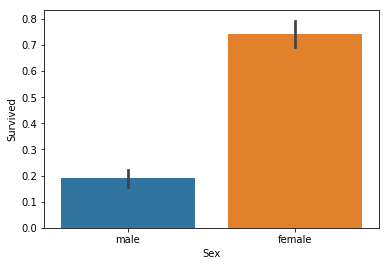

In [5]:
#draw a bar plot of survival by sex
sns.barplot(x="Sex", y="Survived", data=train)

#print percentages of females vs. males that survive
print("Percentage of females who survived:", 
      train["Survived"][train["Sex"] == 'female'].value_counts(normalize = True)[1]*100)

print("Percentage of males who survived:", 
      train["Survived"][train["Sex"] == 'male'].value_counts(normalize = True)[1]*100)

# Pclassと生存

Percentage of Pclass = 1 who survived: 62.96296296296296
Percentage of Pclass = 2 who survived: 47.28260869565217
Percentage of Pclass = 3 who survived: 24.236252545824847


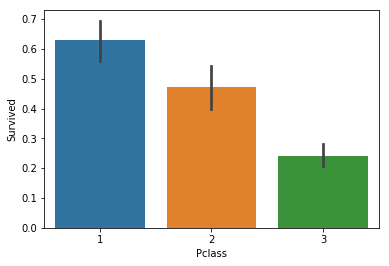

In [6]:
#draw a bar plot of survival by Pclass
sns.barplot(x="Pclass", y="Survived", data=train)

#print percentage of people by Pclass that survived
print("Percentage of Pclass = 1 who survived:", train["Survived"][train["Pclass"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of Pclass = 2 who survived:", train["Survived"][train["Pclass"] == 2].value_counts(normalize = True)[1]*100)

print("Percentage of Pclass = 3 who survived:", train["Survived"][train["Pclass"] == 3].value_counts(normalize = True)[1]*100)

# SibSpと生存

Percentage of SibSp = 0 who survived: 34.53947368421053
Percentage of SibSp = 1 who survived: 53.588516746411486
Percentage of SibSp = 2 who survived: 46.42857142857143


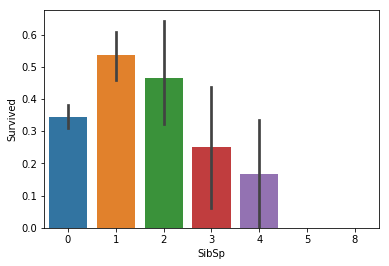

In [7]:
#draw a bar plot for SibSp vs. survival
sns.barplot(x="SibSp", y="Survived", data=train)

#I won't be printing individual percent values for all of these.
print("Percentage of SibSp = 0 who survived:", train["Survived"][train["SibSp"] == 0].value_counts(normalize = True)[1]*100)

print("Percentage of SibSp = 1 who survived:", train["Survived"][train["SibSp"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of SibSp = 2 who survived:", train["Survived"][train["SibSp"] == 2].value_counts(normalize = True)[1]*100)

# Parch Feature

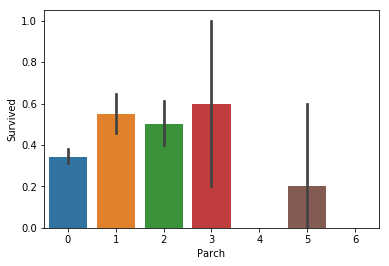

In [8]:
sns.barplot(x="Parch", y="Survived", data=train)

# Age Feature

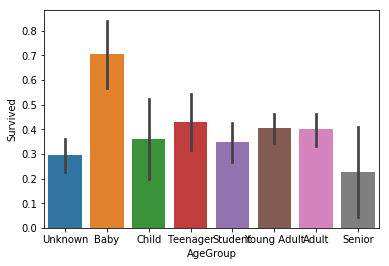

In [9]:
#sort the ages into logical categories
train["Age"] = train["Age"].fillna(-0.5)
test["Age"] = test["Age"].fillna(-0.5)
bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
labels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
train['AgeGroup'] = pd.cut(train["Age"], bins, labels = labels)
test['AgeGroup'] = pd.cut(test["Age"], bins, labels = labels)

#draw a bar plot of Age vs. survival
sns.barplot(x="AgeGroup", y="Survived", data=train)

# Cabin Feature

Percentage of CabinBool = 1 who survived: 66.66666666666666
Percentage of CabinBool = 0 who survived: 29.985443959243085


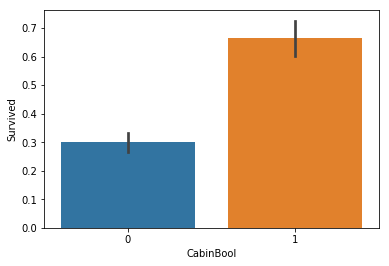

In [10]:
train["CabinBool"] = (train["Cabin"].notnull().astype('int'))
test["CabinBool"] = (test["Cabin"].notnull().astype('int'))

#calculate percentages of CabinBool vs. survived
print("Percentage of CabinBool = 1 who survived:", train["Survived"][train["CabinBool"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of CabinBool = 0 who survived:", train["Survived"][train["CabinBool"] == 0].value_counts(normalize = True)[1]*100)
#draw a bar plot of CabinBool vs. survival
sns.barplot(x="CabinBool", y="Survived", data=train)

# データの整形

In [11]:
#we'll start off by dropping the Cabin feature since not a lot more useful information can be extracted from it.
train = train.drop(['Cabin'], axis = 1)
test = test.drop(['Cabin'], axis = 1)

In [12]:
#we can also drop the Ticket feature since it's unlikely to yield any useful information
train = train.drop(['Ticket'], axis = 1)
test = test.drop(['Ticket'], axis = 1)

In [13]:
#now we need to fill in the missing values in the Embarked feature
print("Number of people embarking in Southampton (S):")
southampton = train[train["Embarked"] == "S"].shape[0]
print(southampton)

print("Number of people embarking in Cherbourg (C):")
cherbourg = train[train["Embarked"] == "C"].shape[0]
print(cherbourg)

print("Number of people embarking in Queenstown (Q):")
queenstown = train[train["Embarked"] == "Q"].shape[0]
print(queenstown)

Number of people embarking in Southampton (S):
644
Number of people embarking in Cherbourg (C):
168
Number of people embarking in Queenstown (Q):
77


In [14]:
#replacing the missing values in the Embarked feature with S
train = train.fillna({"Embarked": "S"})

In [15]:
#create a combined group of both datasets
combine = [train, test]

#extract a title for each Name in the train and test datasets
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train['Title'], train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [16]:
#replace various titles with more common names
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Capt', 'Col',
    'Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Rare')
    
    dataset['Title'] = dataset['Title'].replace(['Countess', 'Lady', 'Sir'], 'Royal')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.285714
5,Royal,1.000000


In [17]:
#map each of the title groups to a numerical value
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Royal": 5, "Rare": 6}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

In [18]:
# fill missing age with mode age group for each title
mr_age = train[train["Title"] == 1]["AgeGroup"].mode() #Young Adult
miss_age = train[train["Title"] == 2]["AgeGroup"].mode() #Student
mrs_age = train[train["Title"] == 3]["AgeGroup"].mode() #Adult
master_age = train[train["Title"] == 4]["AgeGroup"].mode() #Baby
royal_age = train[train["Title"] == 5]["AgeGroup"].mode() #Adult
rare_age = train[train["Title"] == 6]["AgeGroup"].mode() #Adult

age_title_mapping = {1: "Young Adult", 2: "Student", 3: "Adult", 4: "Baby", 5: "Adult", 6: "Adult"}

#I tried to get this code to work with using .map(), but couldn't.
#I've put down a less elegant, temporary solution for now.
#train = train.fillna({"Age": train["Title"].map(age_title_mapping)})
#test = test.fillna({"Age": test["Title"].map(age_title_mapping)})

for x in range(len(train["AgeGroup"])):
    if train["AgeGroup"][x] == "Unknown":
        train["AgeGroup"][x] = age_title_mapping[train["Title"][x]]
        
for x in range(len(test["AgeGroup"])):
    if test["AgeGroup"][x] == "Unknown":
        test["AgeGroup"][x] = age_title_mapping[test["Title"][x]]

In [19]:
#map each Age value to a numerical value
age_mapping = {'Baby': 1, 'Child': 2, 'Teenager': 3, 'Student': 4, 'Young Adult': 5, 'Adult': 6, 'Senior': 7}
train['AgeGroup'] = train['AgeGroup'].map(age_mapping)
test['AgeGroup'] = test['AgeGroup'].map(age_mapping)

train.head()

#dropping the Age feature for now, might change
train = train.drop(['Age'], axis = 1)
test = test.drop(['Age'], axis = 1)

In [20]:
#drop the name feature since it contains no more useful information.
train = train.drop(['Name'], axis = 1)
test = test.drop(['Name'], axis = 1)

In [21]:
#map each Sex value to a numerical value
sex_mapping = {"male": 0, "female": 1}
train['Sex'] = train['Sex'].map(sex_mapping)
test['Sex'] = test['Sex'].map(sex_mapping)

In [22]:
#map each Embarked value to a numerical value
embarked_mapping = {"S": 1, "C": 2, "Q": 3}
train['Embarked'] = train['Embarked'].map(embarked_mapping)
test['Embarked'] = test['Embarked'].map(embarked_mapping)

In [23]:
#fill in missing Fare value in test set based on mean fare for that Pclass 
for x in range(len(test["Fare"])):
    if pd.isnull(test["Fare"][x]):
        pclass = test["Pclass"][x] #Pclass = 3
        test["Fare"][x] = round(train[train["Pclass"] == pclass]["Fare"].mean(), 4)
        
#map Fare values into groups of numerical values
train['FareBand'] = pd.qcut(train['Fare'], 4, labels = [1, 2, 3, 4])
test['FareBand'] = pd.qcut(test['Fare'], 4, labels = [1, 2, 3, 4])

#drop Fare values
train = train.drop(['Fare'], axis = 1)
test = test.drop(['Fare'], axis = 1)

In [24]:
# most correlated features
corrmat = train.corr()
#top_corr_features = corrmat.index[abs(corrmat["Survived"])>0.3]
#plt.figure(figsize=(10,10))
g = sns.heatmap(train[top_corr_features].corr(),annot=True,cmap="RdYlGn")

NameError: name 'top_corr_features' is not defined

# モデル

In [28]:
from sklearn.model_selection import train_test_split

predictors = train.drop(['Survived', 'PassengerId'], axis=1)
target = train["Survived"]
x_train, x_val, y_train, y_val = train_test_split(predictors, target, test_size = 0.2, random_state = 0)

# ガウスナイーブベイズ

In [29]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
y_pred = gaussian.predict(x_val)
acc_gaussian = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_gaussian)

79.33


# ロジスティック回帰

In [30]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_val)
acc_logreg = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_logreg)

78.21


# サポートベクタマシン

In [31]:
# Support Vector Machines
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_val)
acc_svc = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_svc)

82.68


# Linear SVC

In [32]:
# Linear SVC
from sklearn.svm import LinearSVC

linear_svc = LinearSVC()
linear_svc.fit(x_train, y_train)
y_pred = linear_svc.predict(x_val)
acc_linear_svc = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_linear_svc)


77.09


# パーセプトロン

In [33]:
# Perceptron
from sklearn.linear_model import Perceptron

perceptron = Perceptron()
perceptron.fit(x_train, y_train)
y_pred = perceptron.predict(x_val)
acc_perceptron = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_perceptron)

75.42


# 決定木

In [34]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

decisiontree = DecisionTreeClassifier()
decisiontree.fit(x_train, y_train)
y_pred = decisiontree.predict(x_val)
acc_decisiontree = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_decisiontree)

79.89


# ランダムフォレスト

In [35]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier()
randomforest.fit(x_train, y_train)
y_pred = randomforest.predict(x_val)
acc_randomforest = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_randomforest)

85.47


In [36]:
# KNN or k-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_val)
acc_knn = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_knn)

81.56


In [37]:
# Stochastic Gradient Descent
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()
sgd.fit(x_train, y_train)
y_pred = sgd.predict(x_val)
acc_sgd = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_sgd)

75.42


In [38]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

gbk = GradientBoostingClassifier()
gbk.fit(x_train, y_train)
y_pred = gbk.predict(x_val)
acc_gbk = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_gbk)

82.12


In [39]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 'Linear SVC', 
              'Decision Tree', 'Stochastic Gradient Descent', 'Gradient Boosting Classifier'],
    'Score': [acc_svc, acc_knn, acc_logreg, 
              acc_randomforest, acc_gaussian, acc_perceptron,acc_linear_svc, acc_decisiontree,
              acc_sgd, acc_gbk]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,85.47
0,Support Vector Machines,82.68
9,Gradient Boosting Classifier,82.12
1,KNN,81.56
7,Decision Tree,79.89
4,Naive Bayes,79.33
2,Logistic Regression,78.21
6,Linear SVC,77.09
5,Perceptron,75.42
8,Stochastic Gradient Descent,75.42


# 提出用ファイルを作成

In [40]:
#set ids as PassengerId and predict survival 
ids = test['PassengerId']
predictions = gbk.predict(test.drop('PassengerId', axis=1))

#set the output as a dataframe and convert to csv file named submission.csv
output = pd.DataFrame({ 'PassengerId' : ids, 'Survived': predictions })
output.to_csv('submission.csv', index=False)

In [41]:
from sklearn.linear_model import LinearRegression

#最小２乗法による偏係数
OLR = LinearRegression().fit(x_train, y_train)
y_pred = OLR.predict(x_val)

y_pred = y_pred > 0.5
y_pred.astype(np.int)

acc_OLR = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_OLR)

76.54


In [42]:
y_pred = OLR.predict(x_val)
score = []
a = np.arange(101)*0.01
for i in a:
    th = i
    y_pred_sub = y_pred > th
    y_pred_sub.astype(np.int)
    score.append(round(accuracy_score(y_pred_sub, y_val) * 100, 2))

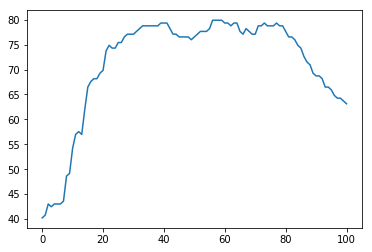

In [43]:
plt.plot(score)

# グリッドサーチ

パラメータをチューニングしてモデルの汎化性能を向上させる方法として、グリッドサーチがある。

モデルの重要なパラメータに対して最良の汎化性能を与える設定を見つけるのは難しい仕事だが、全てのモデル、全てのデータセットに対して行わなければならない。



In [53]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

iris = load_iris()
train_X, val_X, train_y, val_y = train_test_split(iris.data, iris.target, test_size=0.2, random_state=0)

best_score=0

gamma_list = [0.001, 0.01, 0.1, 1, 10, 100]
C_list = [0.001, 0.01, 0.1, 1, 10, 100]

for gamma in gamma_list:
    for C in C_list:
        svm = SVC(gamma=gamma, C=C)
        svm.fit(train_X, train_y)
        score = svm.score(val_X, val_y)
        if score > best_score:
            best_score = score
            best_params = {'C':C, 'gamma':gamma}

In [55]:
print(best_score)
print(best_params)

1.0
{'C': 100, 'gamma': 0.001}


In [60]:
from sklearn.metrics import accuracy_score
svm = SVC(gamma=best_params['gamma'], C=best_params['C'])
svm.fit(train_X, train_y)
pred = svm.predict(val_X)

acc = accuracy_score(pred, val_y)

In [61]:
acc

1.0

In [65]:
svc = SVC(**best_params)

In [66]:
svc

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [86]:
from sklearn.model_selection import GridSearchCV

params_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
                'gamma':[0.001, 0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(SVC(), params_grid, cv=5)

In [87]:
grid_search = grid_search.fit(train_X, train_y)

In [88]:
pred = grid_search.predict(val_X)

print(accuracy_score(pred, val_y))

1.0


In [89]:
grid_search.best_params_

{'C': 1, 'gamma': 0.1}

In [90]:
grid_search.best_score_

0.9583333333333334

In [91]:
grid_search.best_estimator_

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [93]:
grid_search.cv_results_

{'mean_fit_time': array([0.00096521, 0.00068417, 0.00070524, 0.00071778, 0.00059214,
        0.00053988, 0.00055957, 0.00053821, 0.00056787, 0.00054827,
        0.00054708, 0.00059671, 0.00052595, 0.00050478, 0.00042481,
        0.00045719, 0.00051069, 0.00056152, 0.0004858 , 0.00038843,
        0.0003099 , 0.00036893, 0.00060892, 0.00063872, 0.00037141,
        0.00029378, 0.0002872 , 0.00036535, 0.00062265, 0.00065141,
        0.00029731, 0.00028577, 0.00028625, 0.00039735, 0.00065799,
        0.00063295]),
 'std_fit_time': array([2.79902868e-04, 1.77960585e-05, 3.79638449e-05, 4.78803870e-05,
        6.58077778e-05, 4.51260306e-06, 5.52044821e-05, 1.15799784e-05,
        3.70252309e-05, 1.64861577e-05, 3.66451760e-06, 4.56745286e-05,
        2.81184367e-05, 6.37857707e-06, 9.17635913e-06, 2.18621387e-05,
        3.54915506e-06, 5.21782751e-06, 3.11928048e-05, 3.21033605e-05,
        1.14242063e-06, 6.13361625e-06, 1.17914801e-05, 3.05172056e-05,
        1.34459624e-05, 4.26069410e-0

In [94]:
import pandas as pd
results = pd.DataFrame(grid_search.cv_results_)
display(results.head())

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_C,param_gamma,params,rank_test_score,split0_test_score,split0_train_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.000965,0.000311,0.366667,0.366671,0.001,0.001,"{'C': 0.001, 'gamma': 0.001}",22,0.36,0.368421,...,0.375,0.364583,0.375,0.364583,0.363636,0.367347,0.000280,0.000034,0.006927,0.001749
1,0.000684,0.000291,0.366667,0.366671,0.001,0.01,"{'C': 0.001, 'gamma': 0.01}",22,0.36,0.368421,...,0.375,0.364583,0.375,0.364583,0.363636,0.367347,0.000018,0.000017,0.006927,0.001749
2,0.000705,0.000285,0.366667,0.366671,0.001,0.1,"{'C': 0.001, 'gamma': 0.1}",22,0.36,0.368421,...,0.375,0.364583,0.375,0.364583,0.363636,0.367347,0.000038,0.000023,0.006927,0.001749
3,0.000718,0.000313,0.366667,0.366671,0.001,1,"{'C': 0.001, 'gamma': 1}",22,0.36,0.368421,...,0.375,0.364583,0.375,0.364583,0.363636,0.367347,0.000048,0.000086,0.006927,0.001749
4,0.000592,0.000248,0.366667,0.366671,0.001,10,"{'C': 0.001, 'gamma': 10}",22,0.36,0.368421,...,0.375,0.364583,0.375,0.364583,0.363636,0.367347,0.000066,0.000054,0.006927,0.001749


In [96]:
scores = np.array(results.mean_test_score).reshape(6,6)

In [97]:
scores

array([[0.36666667, 0.36666667, 0.36666667, 0.36666667, 0.36666667,
        0.36666667],
       [0.36666667, 0.36666667, 0.36666667, 0.36666667, 0.36666667,
        0.36666667],
       [0.36666667, 0.69166667, 0.91666667, 0.95      , 0.36666667,
        0.36666667],
       [0.69166667, 0.93333333, 0.95833333, 0.95      , 0.90833333,
        0.55      ],
       [0.93333333, 0.95833333, 0.95833333, 0.95      , 0.9       ,
        0.59166667],
       [0.95833333, 0.95833333, 0.95      , 0.93333333, 0.9       ,
        0.59166667]])

# 混同行列

In [100]:
from sklearn.metrics import confusion_matrix as cm

confusions = cm(pred, val_y)
confusions

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]])

# パイプライン

Pipelineクラスを用いて、MinMaxScalerによるスケール変換を行ってからSVMを訓練するワークフローを表現する方法をみる


In [103]:
from sklearn.pipeline import Pipeline



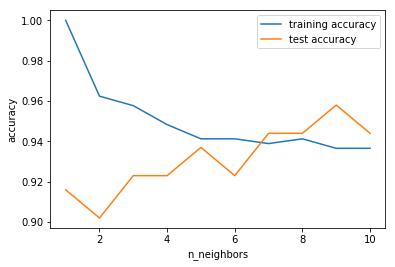

In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()
 
train_X, val_X, train_y, val_y = \
train_test_split(cancer.data, cancer.target, random_state=0)
 
training_accuracy = []
test_accuracy = []
 
neighbors_settings = range(1,11)
for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(train_X, train_y)
    
    training_accuracy.append(accuracy_score(clf.predict(train_X), train_y))
    test_accuracy.append(accuracy_score(clf.predict(val_X), val_y))
     
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.savefig('accuracu_plot.png')